### k-Means

#### References:
- [kMeans Algorithm](https://en.wikipedia.org/wiki/K-means_clustering#Algorithms)
- [Scikit-learn kMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

<a href="https://colab.research.google.com/github/paulaceccon/dl-from-scratch/blob/main/notebooks/dnn_tensorflow.ipynb" target="_parent" style="float: left;"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs

%matplotlib inline

In [2]:
# Pre-defined data, providing a controled env
blob_centers = np.array(
    [[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8], [-2.8, 2.8], [-2.8, 1.3]]
)
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(
    n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7
)

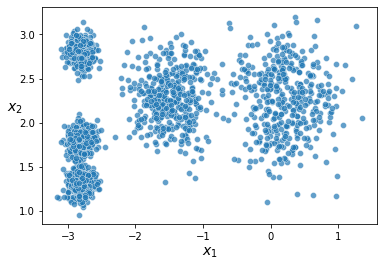

In [3]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], alpha=0.7)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0);

In [5]:
class KMeans:
    """
    Implements a basic kmeans clustering.
    Initial centroids will be randomly initialized.

    Args:
        n_clusters: number clusters.
    """

    def __init__(self, n_clusters: int = 3):
        self._k: int = n_clusters
        self._X: np.ndarray = None
        self._y: np.ndarray = None
        self._centroids: np.ndarray = None

    def fit(self, X: np.ndarray) -> None:
        """Compute k-means clustering."""
        self._X = X
        self._y = y

        self._train()

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Predict the closest cluster each sample in X belongs to."""
        return self._closest_centroids(X)

    def _train(self):
        """
        Generate the clusters from the traning data.

        Algorithm:
            1. Generate random centroids.
            2. Assing data to clusters.
            3. Update clusters based on each instance distance to centroids.
            4. Repeat 2. and 3. util the clusters stop changing.
        """
        self._initialize_centroids()
        labels = self._closest_centroids(self._X)

        while True:
            self._update_centroids(labels)
            new_labels = self._closest_centroids(self._X)
            if self._differences(labels, new_labels) == 0:
                self._labels = new_labels
                return
            labels = new_labels

    def _initialize_centroids(self) -> None:
        """Create random centroids."""
        centroids_idx = np.random.choice(len(self._X), self._k, replace=False)
        self._centroids = self._X[centroids_idx]

    def _closest_centroids(self, X: np.ndarray) -> np.ndarray:
        """Update the labels for a given data."""
        distances = np.linalg.norm(X - self._centroids[:, np.newaxis], axis=2)
        return np.argmin(distances, axis=0)

    def _update_centroids(self, centroids: np.ndarray) -> None:
        """Update the centroids based on the cluster instances."""
        self._centroids = np.array(
            [self._X[np.where(centroids == c)].mean(axis=0) for c in range(self._k)]
        )

    def _differences(self, old_labels: np.ndarray, new_labels: np.ndarray) -> int:
        """Check if the cluste"s were updated."""
        return np.abs(old_labels - new_labels).sum()

In [6]:
n_clusters = 5
clf = KMeans(n_clusters=n_clusters)
clf.fit(X)
y_pred = clf.predict(X)

#### Decision Boundary Visualization

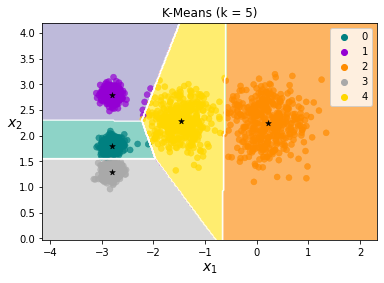

In [7]:
cmap_bold = {0: "teal", 1: "darkviolet", 2: "darkorange", 3: "darkgrey", 4: "gold"}

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap="Set3")
plt.contour(xx, yy, Z, linewidths=1, colors="white", alpha=0.7)

# Plot the training points
sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=y_pred,
    palette=cmap_bold,
    alpha=0.7,
    edgecolor=None,
)
# Plot the centroids
sns.scatterplot(
    x=clf._centroids[:, 0],
    y=clf._centroids[:, 1],
    alpha=1.0,
    color="k",
    edgecolor=None,
    marker="*",
    legend=False,
)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"K-Means (k = {n_clusters})")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0);